# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest regressor, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)
The URL here has many query parameters
- q for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- l for a location
- start for what result number to start on

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"


In [5]:
## YOUR CODE HERE
html = urllib.urlopen(URL).read()
soup = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a nobr element inside of a td element with class='snip.
- The title of a job is in a link with class set to jobtitle and a data-tn-element="jobTitle.
- The location is set in a span with class='location'.
- The company is set in a span with class='company'.

## Write 4 functions to extract each item: location, company, job, and salary.¶
Example
```python
def extract_location_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [51]:
##SALARY
salary=[]
for item in soup.find_all(name='div', attrs={'class':' row result'}):
    salary.append(item.find(name='nobr'))
    
salary

[None, None, None, None, None, None, None, None, None]

In [53]:
##TITLE
jobs=[]
for item in soup.find_all(name='div', attrs={'class':' row result'}):
    jobs.append(item.find(name='h2').text)

jobs

[u'\nQuantitative Analyst\n',
 u'\nData Scientist\n',
 u'\nData Scientist (NYC)\n',
 u'\nData Scientist\n',
 u'\nDigital Intelligence - Data Scientist\n',
 u'\nData Scientist - Research, Insights & Segmentation\n',
 u'\nData scientist / KDB Developer\n',
 u'\nData Scientist\n',
 u'\nData Scientist / Quantitative Developer\n']

In [54]:
##LOCATION
location=[]
for item in soup.find_all(name='div', attrs={'class':' row result'}):
    location.append(item.find(name='span', attrs={'itemprop':'addressLocality'}).text)
    
location

[u'New York, NY',
 u'New York, NY 10018 (Clinton area)',
 u'New York, NY 10001 (Chelsea area)',
 u'New York, NY 10017 (Midtown area)',
 u'New York, NY',
 u'New York, NY 10011 (Chelsea area)',
 u'New York, NY',
 u'New York, NY',
 u'New York, NY 10153 (Midtown area)']

In [55]:
##COMPANY
company=[]
for item in soup.find_all(name='div', attrs={'class':' row result'}):
    company.append(item.find(name='span', attrs={'itemprop':'name'}).text)
    
company

[u'\n    Two Sigma Investments, LLC.',
 u'\n    MediQuire',
 u'\n    Datadog',
 u'\n    Analytic Partners',
 u'\n\n        JPMorgan Chase',
 u'\n\n        Spotify',
 u'\n\n        JPMorgan Chase',
 u'\n\n        adMarketplace',
 u'\n\n        Perella Weinberg Partners']

In [56]:
##SUMMARY
summary=[]
for item in soup.find_all(name='div', attrs={'class':' row result'}):
    summary.append(item.find(name='span', attrs={'class':'summary'}).text)
    
summary

[u'\nExperience working with large data sets. We are seeking world-class researchers and engineers who are obsessive about data analysis and the pursuit of its...',
 u'\nYou will be working with a national database of Electronic Health Record data, claims data and external data on social determinates of health from patients...',
 u"\nYou've written production data pipelines. Join us to build powerful, intelligent data systems. Explore and find meaning in extremely high volumes of data....",
 u'\nAnalytic Partners is looking for Data Scientist candidates with strong analytic and problem solving skills....',
 u'\nDigital Intelligence - Data Scientist. Proprietary data platforms. They are hands-on, without needing an army of engineers or other data scientists to support...',
 u'\nData Scientist - Research, Insights & Segmentation. As Data Scientist, our mission is to turn terabytes of data into insights and get a deep understanding of...',
 u'\nData scientist / KDB Developer. This role is

In [58]:
import pandas as pd
df = pd.DataFrame(columns=["Title","Company","Location", "Summary", "Salary"])
df.Title=jobs
df.Company=company
df.Location=location
df.Summary=summary
df.Salary=salary

In [59]:
df

,Title,Company,Location,Summary,Salary
0,\nQuantitative Analyst\n,"\n Two Sigma Investments, LLC.","New York, NY",\nExperience working with large data sets. We ...,None
1,\nData Scientist\n,\n MediQuire,"New York, NY 10018 (Clinton area)",\nYou will be working with a national database...,None
2,\nData Scientist (NYC)\n,\n Datadog,"New York, NY 10001 (Chelsea area)",\nYou've written production data pipelines. Jo...,None
3,\nData Scientist\n,\n Analytic Partners,"New York, NY 10017 (Midtown area)",\nAnalytic Partners is looking for Data Scient...,None
4,\nDigital Intelligence - Data Scientist\n,\n\n JPMorgan Chase,"New York, NY",\nDigital Intelligence - Data Scientist. Propr...,None
5,"\nData Scientist - Research, Insights & Segmen...",\n\n Spotify,"New York, NY 10011 (Chelsea area)","\nData Scientist - Research, Insights & Segmen...",None
6,\nData scientist / KDB Developer\n,\n\n JPMorgan Chase,"New York, NY",\nData scientist / KDB Developer. This role is...,None
7,\nData Scientist\n,\n\n adMarketplace,"New York, NY",\nYou will be a member of a small but highly t...,None
8,\nData Scientist / Quantitative Developer\n,\n\n Perella Weinberg Partners,"New York, NY 10153 (Midtown area)","\nManage large datasets, ensure consistency an...",None


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.
- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the l=New+York and the start=10. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).
##### Complete the following code to collect results from multiple cities and starting points.
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [15]:
YOUR_CITY = 'Washington+DC'

In [16]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        # Append to the full set of results
        pass



#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [185]:
salary=[]
jobs=[]
location=[]
company=[]
summary=[]

def scrape_salary(URL):
    html = urllib.urlopen(URL).read()
    soup = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
    for item in soup.find_all(name='div', attrs={'class':' row result'}):
        salary.append(item.find(name='nobr'))
    #for item in soup.find_all(name='div', attrs={'class':' row result'}):
        jobs.append(item.find(name='h2').text)
    #for item in soup.find_all(name='div', attrs={'class':' row result'}):
        location.append(item.find(name='span', attrs={'itemprop':'addressLocality'}).text)
    #for item in soup.find_all(name='div', attrs={'class':' row result'}):
        company.append(item.find(name='span', attrs={'itemprop':'name'}).text)
    #for item in soup.find_all(name='div', attrs={'class':' row result'}):
        summary.append(item.find(name='span', attrs={'class':'summary'}).text)
    

    
    
    
    

    



In [186]:
#All over 60k, must have Data Science in name
#DC
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Washington+DC&limit=100&radius=25')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Washington+DC&limit=100&radius=25&start=100')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Washington+DC&limit=100&radius=25&start=200')
#NY
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+$60,000%2B&l=New+York,+NY&limit=100&radius=25')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=New+York%2C+NY&limit=100&radius=25&start=100')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=New+York%2C+NY&limit=100&radius=25&start=200')
#San Fran
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=San+Francisco,+CA&fromage=any&limit=100&sort=&psf=advsrch')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=San+Francisco%2C+CA&limit=100&radius=25&start=100')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=San+Francisco%2C+CA&limit=100&radius=25&start=200')
#Austin,TX
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=%2460%2C000%2B&radius=25&l=Austin%2C+TX&fromage=any&limit=50&sort=&psf=advsrch')
#Chicago
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=Chicago,+IL&fromage=any&limit=100&sort=&psf=advsrch')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Chicago%2C+IL&limit=100&radius=25&start=100')
#Seattle
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=Seattle&fromage=any&limit=100&sort=&psf=advsrch')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Seattle&limit=100&radius=25&start=100')
#Phile
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=Philadelphia,+PA&fromage=any&limit=100&sort=&psf=advsrch')
#L.A.
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=Los+Angeles&fromage=any&limit=100&sort=&psf=advsrch')
#Atlanta
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=%2460%2C000%2B&radius=25&l=Atlanta%2C+GA&fromage=any&limit=50&sort=&psf=advsrch')
#Boston
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=25&l=Boston,+MA&fromage=any&limit=100&sort=&psf=advsrch')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Boston%2C+MA&limit=100&radius=25&start=100')
#Baltimore
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=%2460%2C000%2B&radius=25&l=Baltimore%2C+MD&fromage=any&limit=50&sort=&psf=advsrch')
#Santa Clara CA
scrape_salary('https://www.indeed.com/jobs?as_and=data+scientist&as_phr=%22data+scientist%22&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=$60,000%2B&radius=100&l=Santa+Clara,+CA&fromage=any&limit=100&sort=&psf=advsrch')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Santa+Clara%2C+CA&radius=100&limit=100&start=100')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Santa+Clara%2C+CA&radius=100&limit=100&start=200')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Santa+Clara%2C+CA&radius=100&limit=100&start=300')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Santa+Clara%2C+CA&radius=100&limit=100&start=400')
scrape_salary('https://www.indeed.com/jobs?q=data+scientist+%22data+scientist%22+%2460%2C000%2B&l=Santa+Clara%2C+CA&radius=100&limit=100&start=500')


In [209]:
df = pd.DataFrame(columns=["Title","Company","Location", "Summary", "Salary"])
df.Title=jobs
df.Company=company
df.Location=location
df.Summary=summary
df.Salary=salary

In [188]:
#calculate how many salaries there are
2166 - df.Salary.isnull().sum()

438

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [233]:
## YOUR CODE HERE
df['Title'] = df['Title'].str.replace('\n', '')
df['Company']=df['Company'].str.replace('\n', '')
df['Summary']=df['Summary'].str.replace('\n', '')
df['Salary'] = df.Salary.str.replace('<nobr>?' , '')
df['Salary'] = df.Salary.str.replace('</nobr>?' , '')
df['Salary'] = df.Salary.str.replace('$' , '')
df['Salary'] = df.Salary.str.replace('a year' , '')

df

,Title,Company,Location,Summary,Salary
0,Data Scientist,Excella Consulting,"Washington, DC 20006 (Foggy Bottom area)","Obtaining data from multiple, disparate data s...",None
1,Data Scientist,Booz Allen Hamilton,"Washington, DC",Work as a data scientist with advanced analyti...,None
2,"Data Scientist, Junior",Booz Allen Hamilton,"Alexandria, VA","Data Scientist, Junior. Perform as a data scie...",None
3,Data Scientist,The Johns Hopkins Applied Physics Labo...,"Laurel, MD",The successful candidate will join a growing t...,None
4,Data Scientist,Vox Media,"Washington, DC",Data Scientists are responsible for delivering...,None
5,Data Scientist,xometry,"Bethesda, MD",Xometry is seeking a data scientist to build t...,None
6,Chief Data Scientist,Booz Allen Hamilton,"Washington, DC",Chief Data Scientist. Experience in the applic...,None
7,Data Scientist (TS),Barbaricum,"Washington, DC",Barbaricum is looking for individuals from div...,None
8,"Data Scientist, Mid",Booz Allen Hamilton,"Washington, DC","Data Scientist, Mid. Win the trust of diverse ...",None
9,Senior Data Scientist,Rally Health,"Washington, DC",We are looking for an experienced Data Scienti...,None


In [245]:
df=df.replace('None', np.nan)


In [295]:
df1=df.dropna()
df1= df1[df1['Title'].str.contains("Data Scientist")]
df1['Salary'] = df1.Salary.str.replace('69anhour?' , 'Nan')
df1['Salary'] = df1.Salary.str.replace('85anhour?' , 'Nan')
df1['Salary'] = df1.Salary.str.replace('30anhour?' , 'Nan')
df1=df1.replace('Nan', np.nan)
df1=df1.dropna()
df1=df1.drop_duplicates()
df1 = df1.join(df1['Salary'].str.split('-', 1, expand=True).rename(columns={0:'Min', 1:'Max'}))
df1 = df1.join(df1['Location'].str.split(',', 1, expand=True).rename(columns={0:'City', 1:'State'}))
df1['State'] = df1['State'].apply(lambda x: x.split(' ')[1])

df1

,Title,Company,Location,Summary,Salary,Min,Max,City,State
18,Data Scientist,Jobspring Partners,"Washington, DC 20005 (Logan Circle area)",A leading healthcare startup is looking to bri...,"165,000","165,000",None,Washington,DC
33,Senior Predictive Modeler / Sr. Data Scientist,ITDC,"Washington, DC",Create data dissemination reports which summar...,"150,000","150,000",None,Washington,DC
48,Data Scientist,National Security Agency,"Fort George G Meade, MD",Â· Determining efficient data storage methods ...,"65,572-84,611","65,572","84,611",Fort George G Meade,MD
55,Data Scientist,Central Intelligence Agency,"Washington, DC","If you have experience in data analytics, comp...","62,338-160,300","62,338","160,300",Washington,DC
84,Data Scientist,Spectrum Careers,"Washington, DC",We are looking for a Data Scientist that will ...,"130,000","130,000",None,Washington,DC
98,Senior Data Scientist,Smith Hanley Associates,"Washington, DC",Senior Data Scientist. And unstructured data. ...,"140,000-180,000","140,000","180,000",Washington,DC
120,Data Scientist (Machine Learning),Jobspring Partners,"McLean, VA",Big Data tools:. This Data Scientist will be w...,"120,000-180,000","120,000","180,000",McLean,VA
152,Data Analyst – Junior Data Scientist,Analytic Recruiting,"Washington, DC",Data Analyst / Junior Data Scientist sought by...,"70,000-85,000","70,000","85,000",Washington,DC
166,Data Scientist:Veteran+Military Connected,Veteran Staffing Network of Easter Seals,"McLean, VA","Extensive knowledge of statistics/math, famili...","150,000","150,000",None,McLean,VA
175,Market Risk Data Scientist,All-In Analytics,"Washington, DC",Market Risk Data Scientist 1-2 years experienc...,"80,000-100,000","80,000","100,000",Washington,DC


In [256]:
df2= df1[df1['Salary'].str.contains("anhour")]
df2

,Title,Company,Location,Summary,Salary,Min,Max
330,Senior Business Intelligence/ Data Scientist,"Snap Interactive, Inc.","New York, NY",Ability to present complicated data and models...,30anhour,30anhour,None
650,"Data Scientist, Sr",Arka,"San Francisco, CA","Data Scientist, Sr. Work within a team of othe...",85anhour,85anhour,None
1561,Data Scientist,Xconic,"San Jose, CA 95131 (North Valley area)",2+ experience as data scientist working on var...,69anhour,69anhour,None
1666,"Data Scientist, Sr",Arka,"San Francisco, CA","Data Scientist, Sr. Work within a team of othe...",85anhour,85anhour,None


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [296]:
## YOUR CODE HERE
df1['Min'] = df1['Min'].str.replace(',', '')
df1.Min = df1.Min.astype(float)


In [297]:
df1.dtypes

Title        object
Company      object
Location     object
Summary      object
Salary       object
Min         float64
Max          object
City         object
State        object
dtype: object

### Save your results as a CSV

In [ ]:
# Export to csv


## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [12]:
## YOUR CODE HERE

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [302]:
## YOUR CODE HERE
df1.median()

Min    125000.0
dtype: float64

In [304]:
df1.groupby('State').median()

,Min
State,
CA,140000.0
DC,100000.0
GA,80000.0
IL,125000.0
MA,100000.0
MD,112786.0
NJ,105000.0
NY,130000.0
PA,112500.0


In [311]:
df1['Above Median']=df1['Min'].apply(lambda x: 0 if x <= 125000 else 1)

In [312]:
df1.head()

,Title,Company,Location,Summary,Salary,Min,Max,City,State,Above Median
18,Data Scientist,Jobspring Partners,"Washington, DC 20005 (Logan Circle area)",A leading healthcare startup is looking to bri...,"165,000",165000.0,None,Washington,DC,1
33,Senior Predictive Modeler / Sr. Data Scientist,ITDC,"Washington, DC",Create data dissemination reports which summar...,"150,000",150000.0,None,Washington,DC,1
48,Data Scientist,National Security Agency,"Fort George G Meade, MD",Â· Determining efficient data storage methods ...,"65,572-84,611",65572.0,"84,611",Fort George G Meade,MD,0
55,Data Scientist,Central Intelligence Agency,"Washington, DC","If you have experience in data analytics, comp...","62,338-160,300",62338.0,"160,300",Washington,DC,0
84,Data Scientist,Spectrum Careers,"Washington, DC",We are looking for a Data Scientist that will ...,"130,000",130000.0,None,Washington,DC,1


#### Thought experiment: What is the baseline accuracy for this model?

The baseline accuracy would be 50%. As we are taking the median 50% fall above the median and 50% fall below.

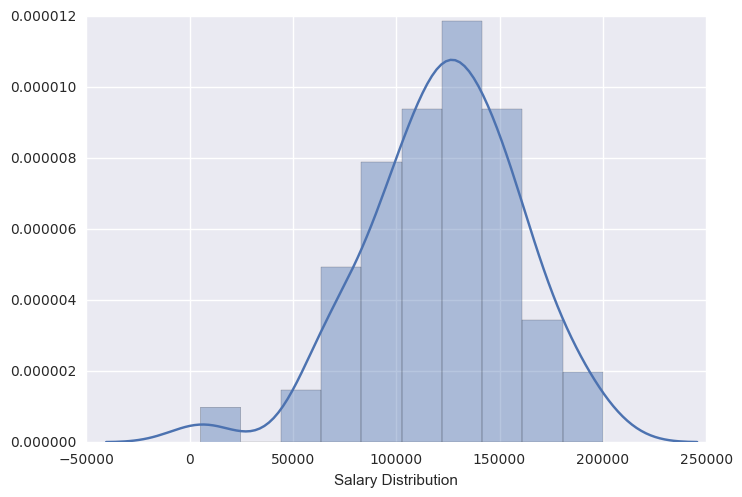

In [488]:
import seaborn as sns
sns.distplot(df2.Min)
plt.xlabel('Salary Distribution')



In [504]:
import matplotlib.pyplot as plt


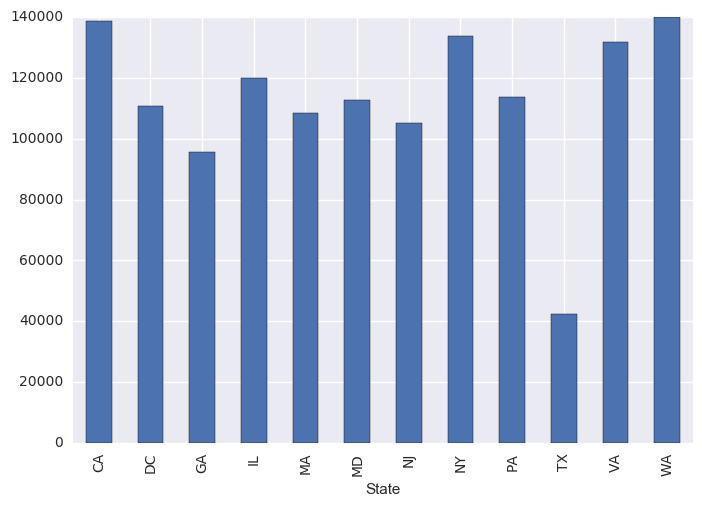

In [514]:
C = df2.groupby('State').Min.mean()#.unstack(level=0).plot(kind='bar', legend=True)

C.plot(kind='bar')

#### Create a Random Forest model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. 

In [381]:
## YOUR CODE HERE
dummies = pd.get_dummies(df1.State)
df2 = pd.concat([df1, dummies], axis=1)
df2

,Title,Company,Location,Summary,Salary,Min,Max,City,State,Above Median,...,GA,IL,MA,MD,NJ,NY,PA,TX,VA,WA
18,Data Scientist,Jobspring Partners,"Washington, DC 20005 (Logan Circle area)",A leading healthcare startup is looking to bri...,"165,000",165000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,Senior Predictive Modeler / Sr. Data Scientist,ITDC,"Washington, DC",Create data dissemination reports which summar...,"150,000",150000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Data Scientist,National Security Agency,"Fort George G Meade, MD",Â· Determining efficient data storage methods ...,"65,572-84,611",65572.0,"84,611",Fort George G Meade,MD,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55,Data Scientist,Central Intelligence Agency,"Washington, DC","If you have experience in data analytics, comp...","62,338-160,300",62338.0,"160,300",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,Data Scientist,Spectrum Careers,"Washington, DC",We are looking for a Data Scientist that will ...,"130,000",130000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Senior Data Scientist,Smith Hanley Associates,"Washington, DC",Senior Data Scientist. And unstructured data. ...,"140,000-180,000",140000.0,"180,000",Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,Data Scientist (Machine Learning),Jobspring Partners,"McLean, VA",Big Data tools:. This Data Scientist will be w...,"120,000-180,000",120000.0,"180,000",McLean,VA,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152,Data Analyst – Junior Data Scientist,Analytic Recruiting,"Washington, DC",Data Analyst / Junior Data Scientist sought by...,"70,000-85,000",70000.0,"85,000",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,Data Scientist:Veteran+Military Connected,Veteran Staffing Network of Easter Seals,"McLean, VA","Extensive knowledge of statistics/math, famili...","150,000",150000.0,None,McLean,VA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
175,Market Risk Data Scientist,All-In Analytics,"Washington, DC",Market Risk Data Scientist 1-2 years experienc...,"80,000-100,000",80000.0,"100,000",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline

In [382]:
X= df2.loc[:, 'CA': 'VA']
y= df2['Above Median']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33) #run train test split for logistic model
cv = StratifiedKFold(Y_train, n_folds=3, shuffle=True, random_state=41)
rf = RandomForestClassifier(n_jobs=-1, random_state=22)
s = cross_val_score(rf, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print 'Accuracy Score:', accuracy_score(Y_test, y_pred).round(3)
print 'Probability Predict', rf.predict_proba(X_test).round(3)
print ''
print 'Confusion Matrix'
print confusion_matrix(Y_test, y_pred)
print ''
print 'Classification Report', classification_report(Y_test, y_pred)

Random Forest Score:	0.549 ± 0.055
Accuracy Score: 0.629
Probability Predict [[ 0.557  0.443]
 [ 0.654  0.346]
 [ 0.464  0.536]
 [ 0.557  0.443]
 [ 0.557  0.443]
 [ 0.75   0.25 ]
 [ 0.324  0.676]
 [ 0.324  0.676]
 [ 0.324  0.676]
 [ 0.324  0.676]
 [ 1.     0.   ]
 [ 0.324  0.676]
 [ 0.464  0.536]
 [ 1.     0.   ]
 [ 1.     0.   ]
 [ 0.47   0.53 ]
 [ 0.324  0.676]
 [ 0.464  0.536]
 [ 1.     0.   ]
 [ 0.557  0.443]
 [ 0.654  0.346]
 [ 0.654  0.346]
 [ 0.638  0.362]
 [ 1.     0.   ]
 [ 0.836  0.164]
 [ 0.557  0.443]
 [ 0.464  0.536]
 [ 1.     0.   ]
 [ 0.464  0.536]
 [ 0.324  0.676]
 [ 0.836  0.164]
 [ 1.     0.   ]
 [ 0.47   0.53 ]
 [ 0.324  0.676]
 [ 0.464  0.536]]

Confusion Matrix
[[13  7]
 [ 6  9]]

Classification Report              precision    recall  f1-score   support

          0       0.68      0.65      0.67        20
          1       0.56      0.60      0.58        15

avg / total       0.63      0.63      0.63        35



#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value? 


In [336]:
## YOUR CODE HERE
df.Title.unique

<bound method Series.unique of 0                                          Data Scientist
1                                          Data Scientist
2                                  Data Scientist, Junior
3                                          Data Scientist
4                                          Data Scientist
5                                          Data Scientist
6                                    Chief Data Scientist
7                                     Data Scientist (TS)
8                                     Data Scientist, Mid
9                                   Senior Data Scientist
10         Counterterrorism Communications Data Scientist
11                                         Data Scientist
12                                         Data Scientist
13                                Data Science Instructor
14                                         Data Scientist
15                                 Data Scientist, Expert
16                              Data Scie

In [383]:
#df2['Job Title']=df2['Title'].apply(lambda x: 1 if x.str.contains("Senior") else 0)
df2['Title_dum']=df2['Title'].str.extract(r'(Senior|Sr|Lead|Junior|Jr)').map({'Senior':'2', 'Sr':'2', 'Lead': '3', 'Junior':'0', 'Jr':'1'})

/Users/Ikekram/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [384]:
df2['Title_dum'].fillna(1, inplace=True)
df2

,Title,Company,Location,Summary,Salary,Min,Max,City,State,Above Median,...,IL,MA,MD,NJ,NY,PA,TX,VA,WA,Title_dum
18,Data Scientist,Jobspring Partners,"Washington, DC 20005 (Logan Circle area)",A leading healthcare startup is looking to bri...,"165,000",165000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
33,Senior Predictive Modeler / Sr. Data Scientist,ITDC,"Washington, DC",Create data dissemination reports which summar...,"150,000",150000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
48,Data Scientist,National Security Agency,"Fort George G Meade, MD",Â· Determining efficient data storage methods ...,"65,572-84,611",65572.0,"84,611",Fort George G Meade,MD,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
55,Data Scientist,Central Intelligence Agency,"Washington, DC","If you have experience in data analytics, comp...","62,338-160,300",62338.0,"160,300",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
84,Data Scientist,Spectrum Careers,"Washington, DC",We are looking for a Data Scientist that will ...,"130,000",130000.0,None,Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
98,Senior Data Scientist,Smith Hanley Associates,"Washington, DC",Senior Data Scientist. And unstructured data. ...,"140,000-180,000",140000.0,"180,000",Washington,DC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
120,Data Scientist (Machine Learning),Jobspring Partners,"McLean, VA",Big Data tools:. This Data Scientist will be w...,"120,000-180,000",120000.0,"180,000",McLean,VA,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
152,Data Analyst – Junior Data Scientist,Analytic Recruiting,"Washington, DC",Data Analyst / Junior Data Scientist sought by...,"70,000-85,000",70000.0,"85,000",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
166,Data Scientist:Veteran+Military Connected,Veteran Staffing Network of Easter Seals,"McLean, VA","Extensive knowledge of statistics/math, famili...","150,000",150000.0,None,McLean,VA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
175,Market Risk Data Scientist,All-In Analytics,"Washington, DC",Market Risk Data Scientist 1-2 years experienc...,"80,000-100,000",80000.0,"100,000",Washington,DC,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [385]:
z=df2[['Title_dum']]
X2=pd.concat([X, z], axis=1)
X2

,CA,DC,GA,IL,MA,MD,NJ,NY,PA,TX,VA,Title_dum
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
84,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [461]:
X= X2

In [386]:

y= df2['Above Median']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33) #run train test split for logistic model
cv = StratifiedKFold(Y_train, n_folds=3, shuffle=True, random_state=41)
rf = RandomForestClassifier(n_jobs=-1, random_state=22)
s = cross_val_score(rf, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print 'Accuracy Score:', accuracy_score(Y_test, y_pred).round(3)
print 'Probability Predict', rf.predict_proba(X_test).round(3)
print ''
print 'Confusion Matrix'
print confusion_matrix(Y_test, y_pred)
print ''
print 'Classification Report', classification_report(Y_test, y_pred)

Random Forest Score:	0.565 ± 0.061
Accuracy Score: 0.657
Probability Predict [[ 0.466  0.534]
 [ 0.476  0.524]
 [ 0.476  0.524]
 [ 0.433  0.567]
 [ 0.536  0.464]
 [ 0.358  0.642]
 [ 0.536  0.464]
 [ 0.776  0.224]
 [ 0.067  0.933]
 [ 1.     0.   ]
 [ 0.466  0.534]
 [ 0.35   0.65 ]
 [ 0.1    0.9  ]
 [ 0.121  0.879]
 [ 0.9    0.1  ]
 [ 0.     1.   ]
 [ 0.476  0.524]
 [ 0.433  0.567]
 [ 0.827  0.173]
 [ 0.476  0.524]
 [ 0.433  0.567]
 [ 0.     1.   ]
 [ 0.466  0.534]
 [ 0.4    0.6  ]
 [ 0.358  0.642]
 [ 0.827  0.173]
 [ 0.536  0.464]
 [ 0.776  0.224]
 [ 0.476  0.524]
 [ 0.476  0.524]
 [ 1.     0.   ]
 [ 0.476  0.524]
 [ 0.466  0.534]
 [ 0.121  0.879]
 [ 0.827  0.173]]

Confusion Matrix
[[ 9 10]
 [ 2 14]]

Classification Report              precision    recall  f1-score   support

          0       0.82      0.47      0.60        19
          1       0.58      0.88      0.70        16

avg / total       0.71      0.66      0.65        35



#### Random Forest Regressor

Let's try treating this as a regression problem. 

- Train a random forest regressor on the regression problem and predict your dependent.
- Evaluate the score with a 5-fold cross-validation
- Do a scatter plot of the predicted vs actual scores for each of the 5 folds, do they match?

In [375]:
## YOUR CODE HERE
X2

,CA,DC,GA,IL,MA,MD,NJ,NY,PA,TX,VA,Title_dum,Title_dum
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
84,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [391]:
y=df2.Min
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33) #run train test split for logistic model
cv = StratifiedKFold(Y_train, n_folds=5, shuffle=True, random_state=41)
rf = RandomForestRegressor(n_jobs=-1, random_state=22)
s = cross_val_score(rf, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)


 Random Forest Score:	-0.187 ± 0.362


In [465]:
#GradientBoostingClassifier
y= df2['Above Median']
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=0.33)
GBC = GradientBoostingClassifier(random_state=22)
s = cross_val_score(GBC, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boost", s.mean().round(3), s.std().round(3))
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_test)
print 'Accuracy Score:', accuracy_score(Y_test, y_pred).round(3)
print GBC.predict_proba(X_test).round(3)


Gradient Boost Score:	0.69 ± 0.09
Accuracy Score: 0.514
[[ 0.518  0.482]
 [ 0.389  0.611]
 [ 0.604  0.396]
 [ 0.992  0.008]
 [ 0.389  0.611]
 [ 0.778  0.222]
 [ 0.15   0.85 ]
 [ 0.778  0.222]
 [ 0.389  0.611]
 [ 0.138  0.862]
 [ 0.778  0.222]
 [ 0.021  0.979]
 [ 0.778  0.222]
 [ 0.983  0.017]
 [ 0.389  0.611]
 [ 0.871  0.129]
 [ 0.021  0.979]
 [ 0.323  0.677]
 [ 0.15   0.85 ]
 [ 0.138  0.862]
 [ 0.986  0.014]
 [ 0.998  0.002]
 [ 0.518  0.482]
 [ 0.871  0.129]
 [ 0.871  0.129]
 [ 0.021  0.979]
 [ 0.017  0.983]
 [ 0.15   0.85 ]
 [ 0.389  0.611]
 [ 0.389  0.611]
 [ 0.017  0.983]
 [ 0.983  0.017]
 [ 0.983  0.017]
 [ 0.059  0.941]
 [ 0.389  0.611]]


In [470]:
importances = GBC.feature_importances_
std = np.std([GBC.feature_importances_ for tree in GBC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.408454)
2. feature 2 (0.078572)
3. feature 0 (0.073335)
4. feature 4 (0.070363)
5. feature 9 (0.065042)
6. feature 8 (0.054161)
7. feature 6 (0.053367)
8. feature 7 (0.050387)
9. feature 5 (0.050384)
10. feature 1 (0.038532)
11. feature 10 (0.033753)
12. feature 3 (0.023649)


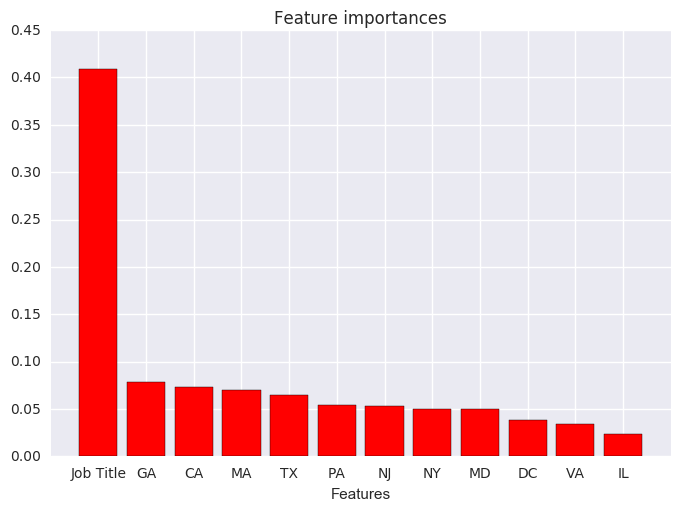

In [527]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels) #indices)
#plt.xticks(x, labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
labels = ['Job Title', 'GA', 'CA', 'MA', 'TX', 'PA', 'NJ', 'NY', 'MD', 'DC', 'VA', 'IL']
plt.show()



#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [454]:
## YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english') #using tfid vectorizer
tvec.fit(df2.Summary) #fitting training data to a tvec fit

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [455]:
## YOUR CODE HERE
vec=pd.DataFrame(tvec.transform(df2.Summary).todense())


In [456]:
vec

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223498,0.00000,0.000000,0.000000
7,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.196695,0.000000


In [457]:
X2.reset_index(drop=True, inplace=True)
X3 = pd.concat( [X2, vec], axis=1)


In [459]:
X3.head()

,CA,DC,GA,IL,MA,MD,NJ,NY,PA,TX,...,554,555,556,557,558,559,560,561,562,563
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
from sklearn.linear_model import LogisticRegression

y= df2['Above Median']
X_train, X_test, Y_train, Y_test = train_test_split(X3, y, test_size=0.33)
log = LogisticRegression(random_state=22)
s = cross_val_score(log, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Logistic Regression", s.mean().round(3), s.std().round(3))
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_test)
print 'Accuracy Score:', accuracy_score(Y_test, y_pred).round(3)
print GBC.predict_proba(X_test).round(3)

Logistic Regression Score:	0.499 ± 0.087
Accuracy Score: 0.4
[[ 0.943  0.057]
 [ 0.063  0.937]
 [ 0.757  0.243]
 [ 0.85   0.15 ]
 [ 0.92   0.08 ]
 [ 0.091  0.909]
 [ 0.239  0.761]
 [ 0.893  0.107]
 [ 0.85   0.15 ]
 [ 0.473  0.527]
 [ 0.117  0.883]
 [ 0.962  0.038]
 [ 0.485  0.515]
 [ 0.947  0.053]
 [ 0.915  0.085]
 [ 0.874  0.126]
 [ 0.418  0.582]
 [ 0.906  0.094]
 [ 0.169  0.831]
 [ 0.172  0.828]
 [ 0.934  0.066]
 [ 0.009  0.991]
 [ 0.273  0.727]
 [ 0.954  0.046]
 [ 0.754  0.246]
 [ 0.052  0.948]
 [ 0.728  0.272]
 [ 0.926  0.074]
 [ 0.703  0.297]
 [ 0.918  0.082]
 [ 0.582  0.418]
 [ 0.144  0.856]
 [ 0.928  0.072]
 [ 0.731  0.269]
 [ 0.839  0.161]]


# REPORT

### Summary

The purpose of this project was to determine whether the salaries of jobs listed on indeed.com were high or low paying jobs. A webscraper was used to gather the data from the website. From analysis of the data it was determined from the very limited sample size that job title was the largest indicator of whether or not a job salary would be "high" or "low". 

### Introduction

Data Science is a rapidly growing field with new jobs popping up everyday. As someone entering the field, it is important for me to get an understanding of the salaries of Data Scientists. In particular I am interested in the entry and base level salaries.

This report is designed to provide insight as to what influences the salary of a Data Scientist. 

### Methodology

The information for this project was gathered using the website indeed.com. Indeed.com is a job listing website. It contains thousands of job listings throughout different cities in the U.S. Using a webscraper, essential information about each job listing pertaining to data scientists was returned. The search was done over a range of various cities and included only listings with Data Scientist explicitly in the title.

For the results that were returned with a salary range, an analysis was completed upon it. Using the minimum of the salary range, the median salary was taken. If the minumum of the salary range for that job was listed as below or equal to the median, it was listed as "Low" pay. If the job's minimum salary was listed above the median, it was listed as "High" pay. The minimum of the range was chosen as it is more reflectie of my job search. High ends of the salary range are also possibly inflated to attract more applicants.

### Results

The most accurate modeling method for determination of whether a job listing would be listed was a gradient boosting classifier. It returned a cross-validation score of 69% + or - 9%.

Therefore it was determined using this model to classify the feature importance. The results:

Feature ranking:
1. feature 11 (0.408454) Job Title
2. feature 2 (0.078572) GA
3. feature 0 (0.073335) CA
4. feature 4 (0.070363) MA
5. feature 9 (0.065042) TX 
6. feature 8 (0.054161) PA
7. feature 6 (0.053367) NJ
8. feature 7 (0.050387) NY
9. feature 5 (0.050384) MD
10. feature 1 (0.038532) DC
11. feature 10 (0.033753) VA
12. feature 3 (0.023649) IL

Feature 11 corresponds to the job title. The other features correspond to different cities. 

### Interpretation

The model decided that job title accounted for 40% of the feature importance.  The higher the feature is in the tree, the more it contributes to the end result. They contribute to a larger fraction of the samples in the tree. The higher the contribution, the higher the feature importance. 

This is a very sensible result. It states that job title is a prime indicator of salary.

### Possible Improvements

Unfortunately this data set was not the largest. Of the thousands of jobs scraped from indeed, only about one hundred had actual salary data. A much larger sample size would have allowed for more accurate results. With a larger data set more detailed and powerful predictions could have been made. A determination of a salary range as opposed to a "high" or "low" salary might have been possible. 
